<a href="https://colab.research.google.com/github/ruval195/Pattern_Recognition/blob/main/Examen_2doParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimeinto de Patrones
## Diego Francisco Ruvalcaba Loredo
## Examen Practico 2do Parcial
### "Hemos juntado datos del grano de cafe y de cateadores profesionales, nos gustaría usar tus habilidades en ML para descubrir tendencias en los datos. ¿Sería posible crear representación visual de los datos usando las variables: Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean Cup, Sweetness. Cualquier cosa interesante nos sirve."


#Librerias

In [68]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar datos
!wget 'https://raw.githubusercontent.com/ruval195/Pattern_Recognition/refs/heads/main/Data_set_ha/data-1.csv'
data = pd.read_csv('data-1.csv')
data.head()


--2025-04-11 15:01:46--  https://raw.githubusercontent.com/ruval195/Pattern_Recognition/refs/heads/main/Data_set_ha/data-1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112964 (110K) [text/plain]
Saving to: ‘data-1.csv.12’

data-1.csv.12       100%[===================>] 110.32K  --.-KB/s    in 0.1s    

2025-04-11 15:01:46 (1016 KB/s) - ‘data-1.csv.12’ saved [112964/112964]



,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


## Exploración Inicial de los Datos

Observamos las variables disponibles, su tipo, la presencia de valores nulos y seleccionamos algunas métricas clave relacionadas con la calidad del grano de café.

In [69]:
data.isnull().sum()
selection = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
            'Uniformity', 'Clean Cup', 'Sweetness']
data = data[selection]
print(data)
data = data.dropna()
data_cluster = data
scaler = StandardScaler()
data = scaler.fit_transform(data)


     Aroma  Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  Clean Cup  \
0     8.58    8.50        8.42     8.58  8.25     8.42        10.0       10.0   
1     8.50    8.50        7.92     8.00  7.92     8.25        10.0       10.0   
2     8.33    8.42        8.08     8.17  7.92     8.17        10.0       10.0   
3     8.08    8.17        8.17     8.25  8.17     8.08        10.0       10.0   
4     8.33    8.33        8.08     8.25  7.92     7.92        10.0       10.0   
..     ...     ...         ...      ...   ...      ...         ...        ...   
202   7.17    7.17        6.92     7.17  7.42     7.17        10.0       10.0   
203   7.33    7.08        6.75     7.17  7.42     7.17        10.0       10.0   
204   7.25    7.17        7.08     7.00  7.08     7.08        10.0       10.0   
205   6.50    6.75        6.75     7.17  7.08     7.00        10.0       10.0   
206   7.25    7.08        6.67     6.83  6.83     6.67        10.0       10.0   

     Sweetness  
0         

## Representación Bidimensional con PCA

Utilizamos Análisis de Componentes Principales para visualizar los datos en un espacio 2D. Esto nos permitirá detectar visualmente posibles agrupaciones o patrones de calidad en el café.

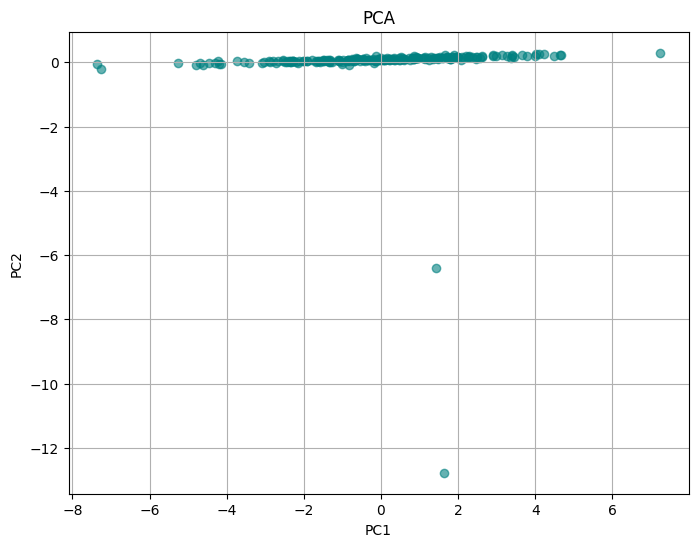

In [70]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], alpha=0.6, c='teal')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.grid(True)
plt.show()


## Agrupamiento con KMeans

A continuación aplicamos KMeans para detectar grupos naturales en los datos embebidos. Usamos el coeficiente de silueta para determinar un número óptimo de clusters.

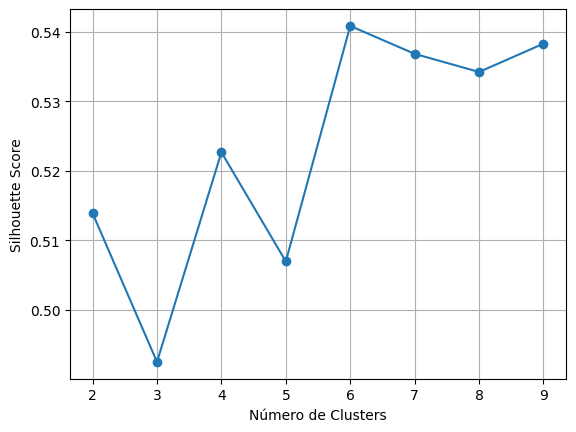

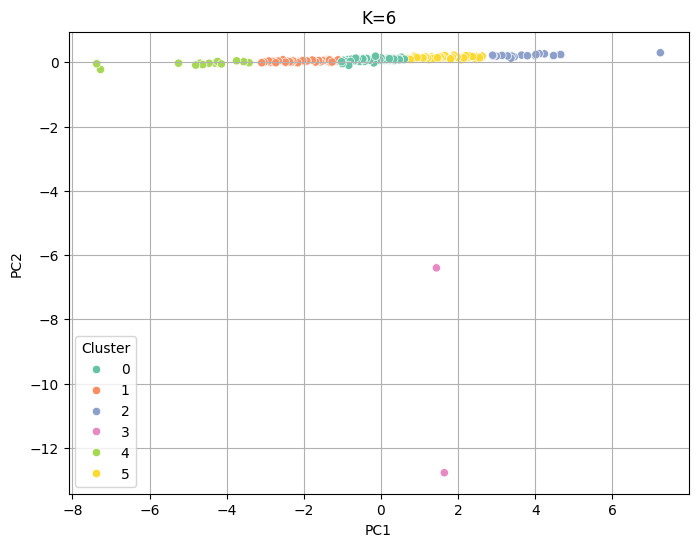

In [71]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_pca)
    score = silhouette_score(data_pca, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

best_k = np.argmax(silhouette_scores) + 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(data_pca)

plt.figure(figsize=(8,6))
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=labels, palette='Set2')
plt.title(f'K={best_k}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Estadísticas por Grupo

Veamos ahora qué caracteriza a cada grupo detectado por KMeans. Esto puede ayudar a entender distintos perfiles sensoriales de café evaluados.

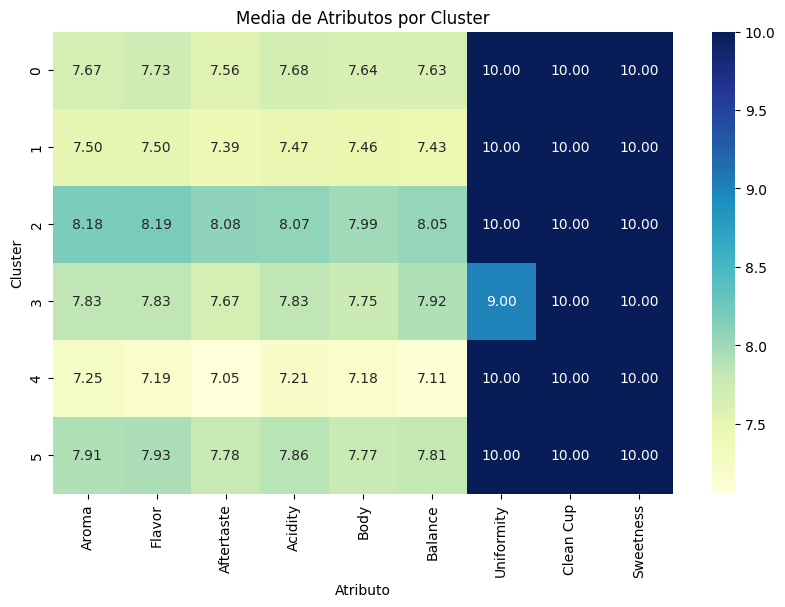

In [72]:
data_cluster['Cluster'] = labels
cluster_means = data_cluster.groupby('Cluster').mean()
cluster_means.T

plt.figure(figsize=(10,6))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Media de Atributos por Cluster')
plt.ylabel('Cluster')
plt.xlabel('Atributo')
plt.show()


## Conclusiones

Se identificaron clusters diferenciados entre los perfiles sensoriales del café, basados en evaluaciones de aroma, sabor, retrogusto, acidez, cuerpo, balance, uniformidad, taza limpia y dulzura. Cada grupo representa un perfil sensorial característico, lo cual puede servir para clasificar granos de café según su experiencia de cata. Por ejemplo, hay clusters con alto aroma y dulzura pero bajo cuerpo, mientras otros se distinguen por un mayor balance y retrogusto. Estos hallazgos pueden ser útiles para guiar decisiones de compra y mezcla de granos, personalizar recomendaciones de café según preferencias de sabor, identificar oportunidades de mejora en la calidad de producción.
